In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("aerofit_treadmill.csv")

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [ ]:
df.shape  #the data contains 180 rows and 9 columns

(180, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
print(df.isnull().sum()) #there are no null values present in the data

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


In [ ]:
#Product,Gender,MaritalStatus are objects(strings),and the rest of the columns are integers

In [ ]:
df.duplicated().sum() # there are also no duplicate values

np.int64(0)

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Age**: average age of people using AeroFit is 28 years,and people from 18 to 50 years are using the product.

**Education**: On average, users have about 15 years of education, which indicates that most customers has higher secondary education.

**Usage**: Customers use the product about 3 times per week on average, suggesting that AeroFit is mainly used by regular but not extreme fitness users.

**Fitness**: The average fitness rating is around 3.3 out of 5, which shows that most users consider themselves to be at a moderate fitness level.

**Income**: most of the customers average income is $53,000 with a maximum of $104,000 and minimum of $29,000.

**miles**: On average, users run or walk about 103 miles with a maximum of 360 miles and minimum of 21 miles.

---





**numerical summery**

In [ ]:
df["Product"].value_counts().reset_index() # kp281,kp481,kp781 are three diffrent aerofit product

,Product,count
0,KP281,80
1,KP481,60
2,KP781,40


In [ ]:
df["Product"].value_counts().describe()# kp481 the mid level trademil has the average sales and kp781 is minimum and kp281 sale the maximum

,count
count,3.0
mean,60.0
std,20.0
min,40.0
25%,50.0
50%,60.0
75%,70.0
max,80.0


In [ ]:
df["Gender"].value_counts().reset_index() # mostly male are using this product than females

,Gender,count
0,Male,104
1,Female,76


In [ ]:
df["MaritalStatus"].value_counts().reset_index()#more partnered (married) are buying this product with maximum 107 than single which the count is only 73

,MaritalStatus,count
0,Partnered,107
1,Single,73


In [ ]:
df.nunique()

,0
Product,3
Age,32
Gender,2
Education,8
MaritalStatus,2
Usage,6
Fitness,5
Income,62
Miles,37


**adding a column**

---


  
    1-poor shape
    2-bad shape
    3-avg shape
    4-good shape
    5-excellent shape

In [ ]:
df1=df.copy()
df1["fitness_category"] = df1.Fitness

In [ ]:
df1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,4
1,KP281,19,Male,15,Single,2,3,31836,75,3
2,KP281,19,Female,14,Partnered,4,3,30699,66,3
3,KP281,19,Male,12,Single,3,3,32973,85,3
4,KP281,20,Male,13,Partnered,4,2,35247,47,2


In [ ]:
df1["fitness_category"].replace({
    1: "Poor shape",
    2: "Bad shape",
    3: "Avg shape",
    4: "Good shape",
    5: "Excellent shape"
},inplace=True)

/tmp/ipython-input-4153482638.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["fitness_category"].replace({


In [ ]:
df1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,Good shape
1,KP281,19,Male,15,Single,2,3,31836,75,Avg shape
2,KP281,19,Female,14,Partnered,4,3,30699,66,Avg shape
3,KP281,19,Male,12,Single,3,3,32973,85,Avg shape
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad shape


**statistical summery**

In [ ]:
#for unique list in product,listed in percentage
prod = df1["Product"].value_counts(normalize=True) * 100
prod_stat = prod.round(2)
print(prod_stat)

Product
KP281    44.44
KP481    33.33
KP781    22.22
Name: proportion, dtype: float64


44.44% customer bought the kp281

33.33% customer bought the kp481

22.22% customer bought the kp781

In [ ]:
#separate gender and percentage of buying of each gender
gen = df1["Gender"].value_counts(normalize=True) * 100
gen = gen.round(2)
print(gen)


Gender
Male      57.78
Female    42.22
Name: proportion, dtype: float64


57.78% are male who buys AeroFit

42.22% are female who buys AeroFit

In [ ]:
# unique martial status who buys aerofit in percentage
marital = df1["MaritalStatus"].value_counts(normalize=True) * 100
marital = marital.round(2)
print(marital)


MaritalStatus
Partnered    59.44
Single       40.56
Name: proportion, dtype: float64


59.44% are married people who buys AeroFit

40.56% are single who buys AeroFit

In [ ]:
# usage of this product per week in percentage
usage = df1["Usage"].value_counts(normalize=True) * 100
usage = usage.round(2)
print(usage)

Usage
3    38.33
4    28.89
2    18.33
5     9.44
6     3.89
7     1.11
Name: proportion, dtype: float64


1. 38.33% is the most that uses of this product which is 3 days.
2. Second is 28.89% who uses the product, which is 4 days.
3. Third is with only 18.33% who uses the product, which is 5 days.
4. And the rest are with 9.44%, 3.89%, 1.11% with 5,6 and 7 days of uses respectively.

In [ ]:
#fitness stats according to the usar in percentage
fitness_stat = df1["Fitness"].value_counts(normalize=True) * 100
fitness_stat = fitness_stat.round(2)
print(fitness_stat)

Fitness
3    53.89
5    17.22
2    14.44
4    13.33
1     1.11
Name: proportion, dtype: float64


1. 53.89% is the most rated and has only "3" out of "5" according to the fitness rating which is above only average.
2. 17.22% has "5" out of "5" according to the fitness rating which is excellent.
3. and rest has 14.44%, 13.33%, 1.11% with 2,4,1 rating respectively.

---




**visual analysis - univariate**


In [ ]:
df1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,Good shape
1,KP281,19,Male,15,Single,2,3,31836,75,Avg shape
2,KP281,19,Female,14,Partnered,4,3,30699,66,Avg shape
3,KP281,19,Male,12,Single,3,3,32973,85,Avg shape
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad shape


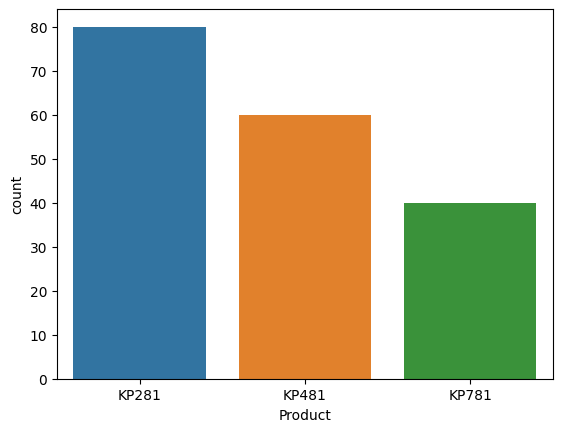

In [ ]:
#product analysis-count plot
sns.countplot(data=df1,x="Product",hue="Product")
plt.show()

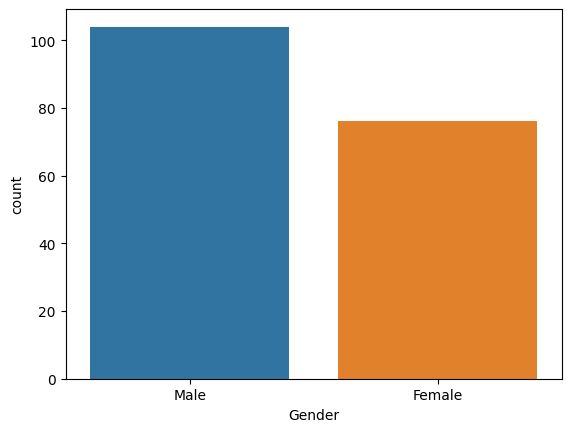

In [ ]:
#Gender analysis-count plot
sns.countplot(data=df1,x="Gender",hue="Gender")
plt.show()

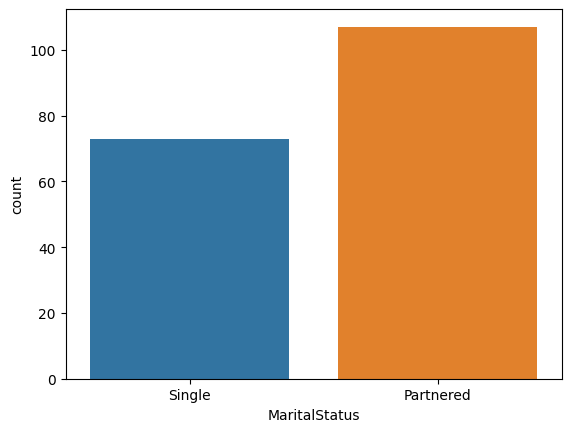

In [ ]:
#marital status analysis-count plot
sns.countplot(data=df1,x="MaritalStatus",hue="MaritalStatus")
plt.show()

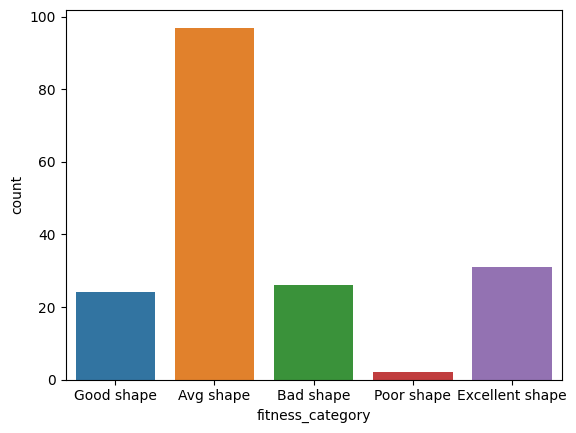

In [ ]:
#fitness stats analysis-count plot
sns.countplot(data=df1,x="fitness_category",hue="fitness_category")
plt.show()

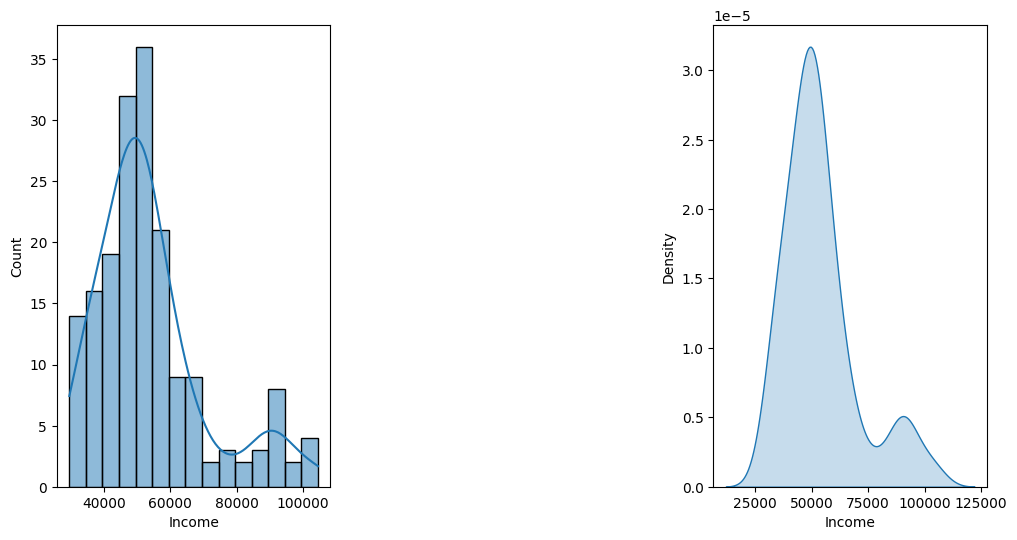

In [ ]:
#income analysis- distplot
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.histplot(data=df1,x="Income",kde=True)

plt.subplot(1,3,3)
sns.kdeplot(data=df1,x="Income",fill=True)
plt.show()

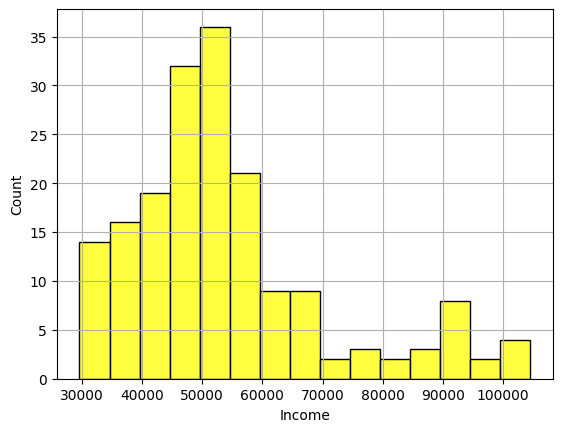

In [ ]:
sns.histplot(data=df1,x="Income",color='yellow')
plt.grid()
plt.show()

1. more than 35 customers earns more than 50-55k per month
2. more than 30 sustomers earns more than 40 to 55k per month
3. 3-5 customers earns more than 100k per month

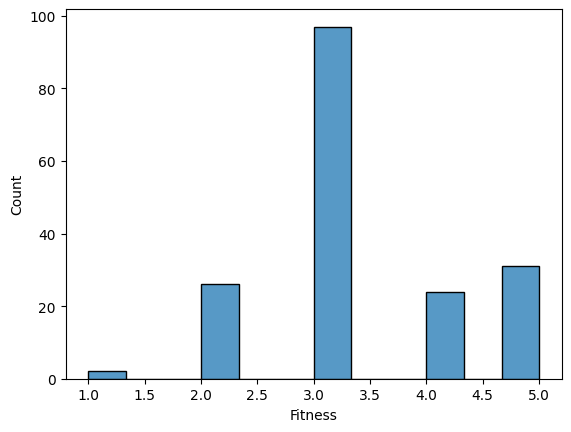

In [ ]:
#fitness analysis - histogram
sns.histplot(data=df1,x="Fitness")
plt.show()

1. almost 100 customers has average shape in fitness
2. only 1 customer has poor shape
3. 23 customers have bad shape
4. 20+ customers have good shape
5. 25+ customers have excellent shape

**box plot - analysis**

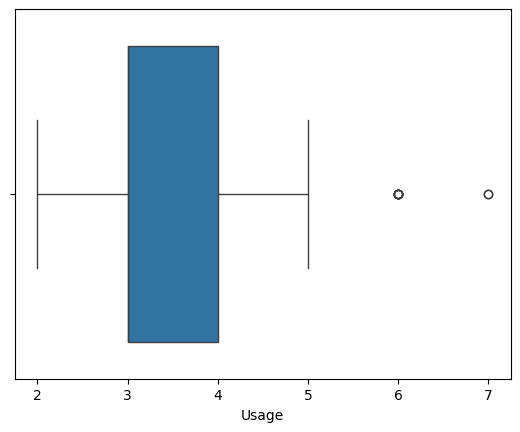

In [ ]:
sns.boxplot(data=df1,x="Usage")
plt.show()

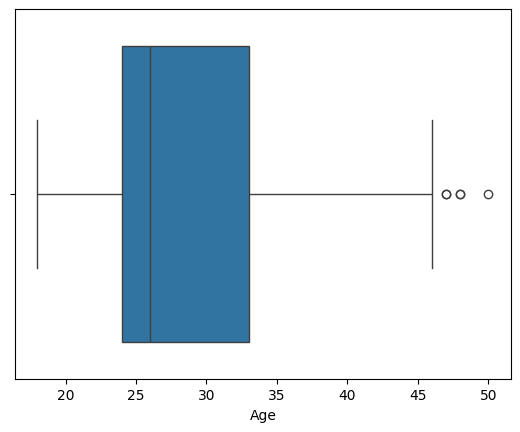

In [ ]:
#age analysis-box plot
sns.boxplot(data=df1,x="Age")
plt.show()

1. Majority of customers are of 23-33 year of age group.
2. rarely some customers are of 45+ age group.
3. The youngest customer of aerofit are of 18+ age group.

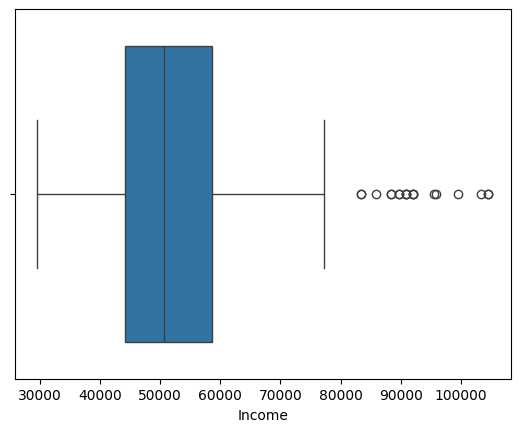

In [ ]:
sns.boxplot(data=df1,x="Income")
plt.show()

1. few customers have income above 80k per annum(outliers).
2. most customers earns 45k to 60k per annum.

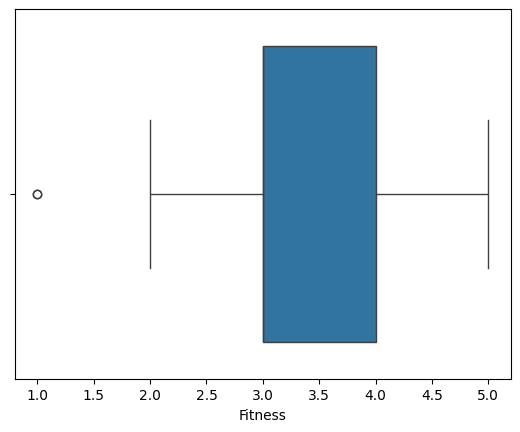

In [ ]:
sns.boxplot(data=df1,x="Fitness")
plt.show()

1. most customers have rated between 3.0 to 4.0

**getting insight using heatmap and pairplot**

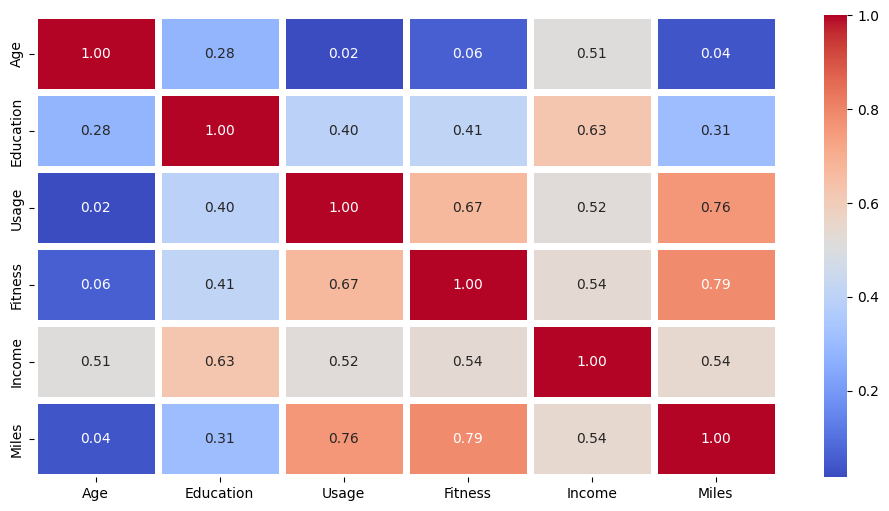

In [ ]:
numeric_df=df1.select_dtypes(include="number")
plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(),annot=True,fmt=".2f",linewidths=5,cmap="coolwarm")
plt.show()

1. correlation between age and miles is 0.03
2. correlation between education and income is 0.62
3. correlation between uasge and fitness is 0.66
4. correlation between fitness and age is 0.06
5. correlation between income and usage is 0.51
6. correlation between miles and age is 0.03

---



**visual analysis - biveriate**

In [ ]:
df1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,Good shape
1,KP281,19,Male,15,Single,2,3,31836,75,Avg shape
2,KP281,19,Female,14,Partnered,4,3,30699,66,Avg shape
3,KP281,19,Male,12,Single,3,3,32973,85,Avg shape
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad shape


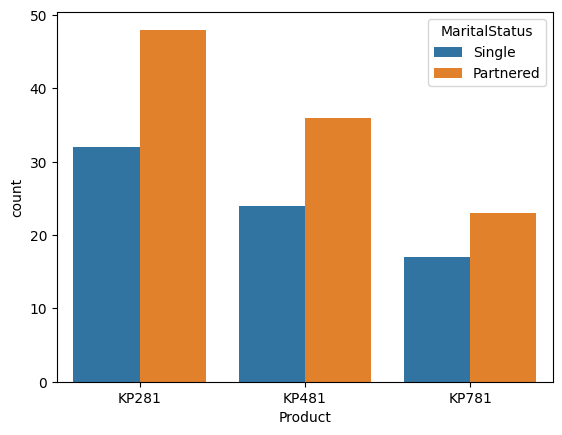

In [ ]:
#product purchased among married/partenerd and single
sns.countplot(data=df1,x="Product",hue="MaritalStatus")
plt.show()

1. kp281 is the most preferred among customers.
2. Most of the married people are interested in buying the trademill.
3. kp781 is the least preferred product.

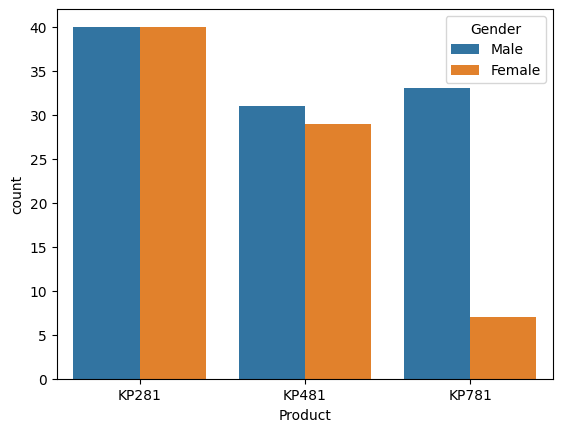

In [ ]:
#Product purchase among Male & Female
sns.countplot(x="Product", hue="Gender", data=df1)
plt.show()

1. Both genders mostly buy entry and mid-level treadmills (kp281 and kp481).  
2. Males show slightly higher purchase of advanced models(kp781).
3. overall male shows higher interest in this product.

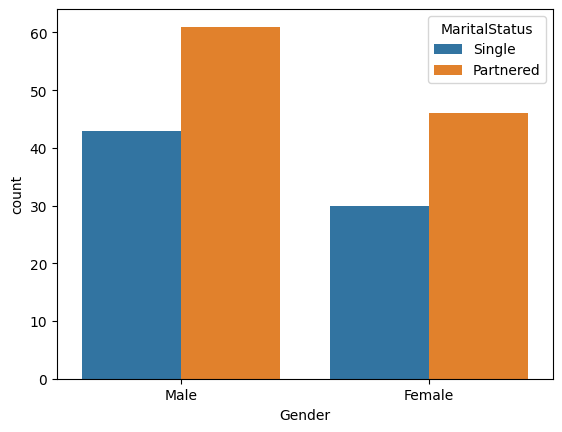

In [ ]:
#Count among Gender & Marital Status
sns.countplot(x="Gender", hue="MaritalStatus", data=df1)
plt.show()

1. Partnered customers are more common buyers in both genders.
2. out of both single and partnerd customers, males customers are significantly high.

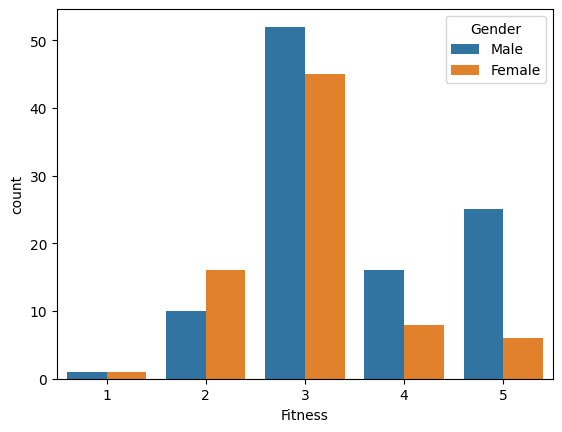

In [ ]:
#Fitness rating by Gender
sns.countplot(x="Fitness", hue="Gender", data=df1)
plt.show()

1. among fitness rating male and female most have rated as average
2. significant number of male customers are at excellent shape as compared to female customers

/tmp/ipython-input-2150319981.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(x="Usage", hue="Gender", data=df1, color="blue")


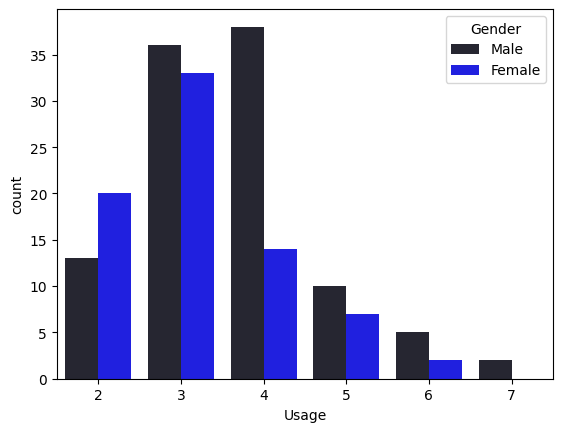

In [ ]:
#Usage (days per week) by Gender
sns.countplot(x="Usage", hue="Gender", data=df1, color="blue")
plt.show()

1. among male and female customers,male usage is 4 days per week.
2. female customers mostly use 3 days per week.
3. only few customers use 7 days per week where as female customer's maximum usage is only 6 days per week.

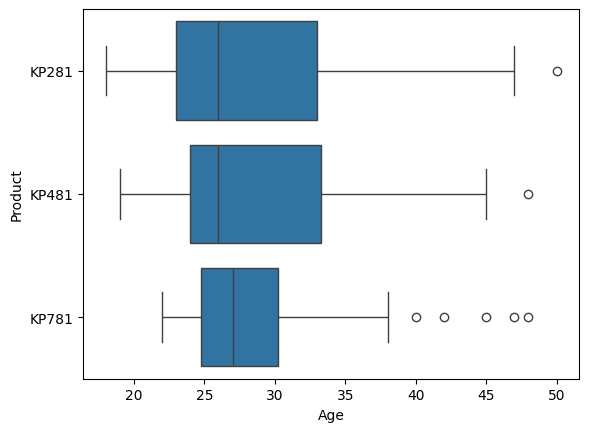

In [ ]:
sns.boxplot(data=df1,x="Age",y="Product")
plt.show()

1. roughly few customers with age above 40 use product kp781.
2. most of the customers are comfortable with kp281 product type.
3. kp481 is the second highest popular product among the younger side of the customer.

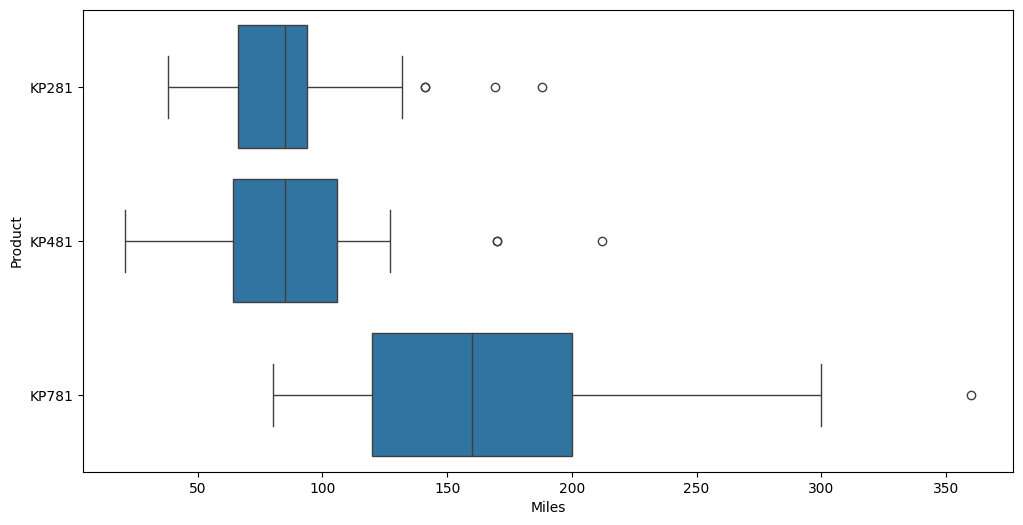

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df1,x="Miles",y="Product")
plt.show()

1. customers with higher eduction of 16 to 18 have preferred mostly kp781 product type.
2. customers between 14 to 16 preferred mostly kp281 and kp481.

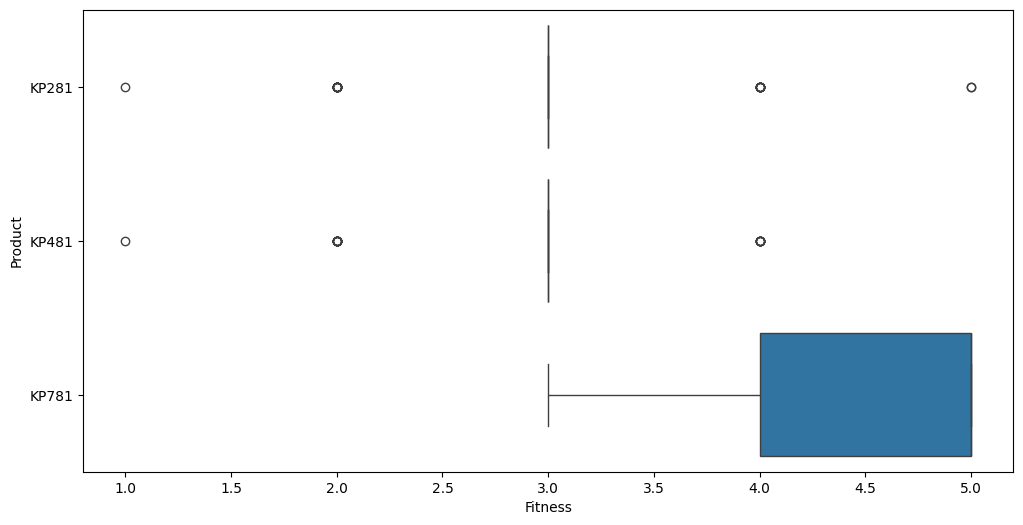

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df1,x="Fitness",y="Product")
plt.show()

1. customers with excellent shape are significantly uses kp781 product type
2. kp481 and kp281 are scattered acorss the fitness rating.

---



# **customer profiling based on the 3product categories provided**

1. **kp281**

    easily affordable entry-level product, which is also the maximum selling product

2. **kp481**

    this is an intermidiate level product

3. **kp781**

    due to the high price and advance type customer prefer less of this product


---




# **recommendations with numbers for the entire casestudy**



**#recommendation no-1**

---



**Position KP781 as a Premium Performance Product**
* 83% of KP781 buyers are male (33 out of 40).

* Median miles = ~160/week vs ~80 for others.

* High-income group ($90k+) mostly buys KP781.


**Target**

* Men aged between 25–45

* Fitness rating 4–5

* Usage between 5–7 days/week

**#recommendation no-2**


---


**Make KP281 the Mass Market Growth Engine**


  * Because , KP281 has highest total buyers (80+)

      **used mainly by**

  * Fitness rating mostly 2–3 out of 5

  * Usage 2–4 days/week

  * used by who has Income in between $40k–$60k

 **Target**

Promote as:

“Perfect beginner treadmill”

Goal:

Convert KP281 → KP481 users in 6–12 months.




**#recommendation no-3**


---



**Use Income Segmentation for Pricing**

***Due to*** - 1. average income ≈ $55k

2.  High-income cluster >$90k buys premium models.

**Target for the company**

For $40k–$60k group

    EMI + seasonal discounts on KP481

For $90k+ group

    Bundle KP781 with add accessories

    *No discount → add value instead.*

**#recommendation no-4**


---

**Leverage Partnered Customers Who Are (60% of the buyers)**

* Partnered customers buy ~60% of all treadmills.

**target**

Introduce:

    Couple fitness discounts on aerofit products

    Include some Family packages

Offer like:

    Buy 2nd treadmill at 10% off